In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

In [34]:
def promedio(lst):
    return sum(lst)/len(lst)

def desvioEstandar(lst):
    prom = promedio(lst)
    return (sum([(x-prom)**2 for x in lst])/len(lst))**0.5

# www.harvard.edu

In [29]:
dfAllHops = pd.read_csv("experimentos/www.harvard.edu-allHops.csv", sep=",")

with open('experimentos/www.harvard.edu-json.json') as json_data:
    lstDic = json.load(json_data)

lstRtt = [dic['rtt'] for dic in lstDic]

[12.388535714285709, 13.312910714285668, 13.055329999999993, 11.930260000000057, 12.188400000000074, 13.018769999999972, 13.498370000000008, 12.668720000000013, 11.007949999999946]


## RTT entre saltos (restar los valores promediados a cada salto)

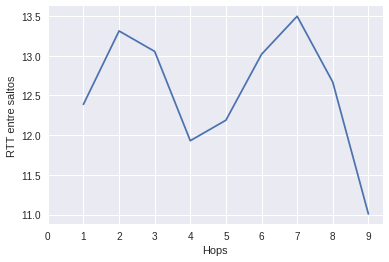

In [32]:
lstX = range(1,len(lstRtt)+1)

plt.plot(lstX, lstRtt)
plt.ylabel('RTT entre saltos')
plt.xlabel('Hops')
plt.xticks(range(len(lstRtt)+1), range(len(lstRtt)+1))
plt.show()

## RTT entre saltos en la ruta, graficar el valor (X i − X̄)/S

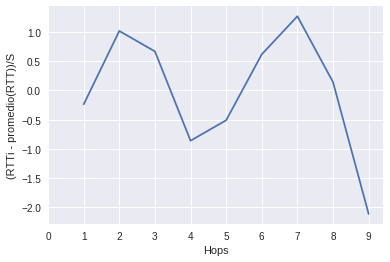

In [43]:
prom = promedio(lstRtt)
s = desvioEstandar(lstRtt)
lstVal = [(x-prom)/s for x in lstRtt]
lstX = range(1,len(lstRtt)+1)

plt.plot(lstX, lstVal)
plt.ylabel('(RTTi - promedio(RTT))/S')
plt.xlabel('Hops')
plt.xticks(range(len(lstX)+1), range(len(lstX)+1))
plt.show()

## Porcentaje que no responden los Time exceeded

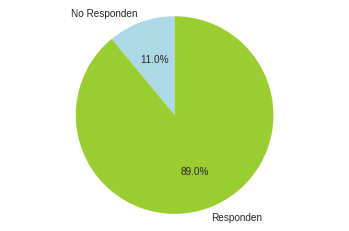

In [42]:
maxVal = max(set(dfAllHops['hop_num']))
lstTE = dfAllHops[dfAllHops['hop_num'] < maxVal]['ip_address']
cantNull = 0
for ip in lstTE:
    if ip == 'null':
        cantNull+=1

porcentajes = [cantNull, len(lstTE) - cantNull]

labels = 'No Responden', 'Responden'
explode = [0,0]

fig1, ax1 = plt.subplots()
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=['lightblue', 'yellowgreen'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Saltos Internacionales